<a href="https://colab.research.google.com/github/tabjun/Image-Data/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [7]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [199]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(len(train_images))
print(len(train_labels))

print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [8]:
# 설명분산력이 80% 가 되는 주성분 개수로 적용
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the data
train_images = train_images.reshape((len(train_images), -1))
test_images = test_images.reshape((len(test_images), -1))
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Define PCA and fit on training data
pca = PCA(n_components=0.8)  # 분산설명력 80%가 되는 축 자동 지정
pca.fit(train_images)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

4422102/4422102 [==============================] - 1s 0us/step
[0.22083547 0.14414633 0.05461176 0.05088686 0.04054887 0.03019511
 0.02747539 0.02313654 0.01692637 0.01318043 0.01170103 0.00962364
 0.00906441 0.00861006 0.00743008 0.00730325 0.00661558 0.00631515
 0.00621938 0.00584283 0.00523388 0.00511121 0.00473533 0.0045008
 0.00438704 0.00417086 0.0039834  0.00390545 0.00377665 0.00373526
 0.00363118 0.00351621 0.00336042 0.00330925 0.00328043 0.00317505
 0.00305205 0.00296661 0.00284695 0.00283068 0.00275586 0.00268136
 0.00262373 0.0025453  0.00247522 0.00240242 0.00237975 0.00228378
 0.00222071 0.00216055]
0.8007059461050501


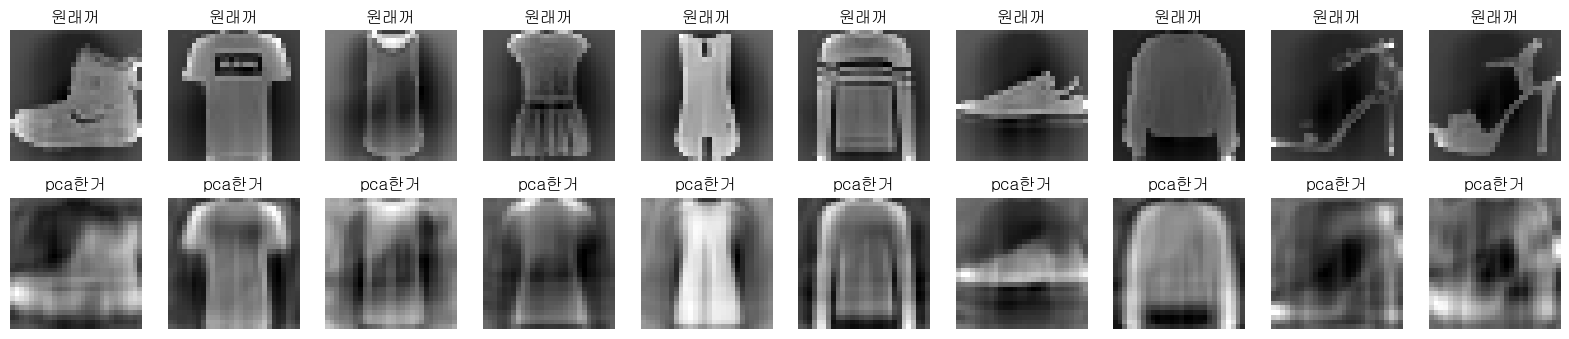

In [9]:
# Transform the data using PCA
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

# Reconstruct images from PCA components
pca_train_images = pca.inverse_transform(train_images_pca)
pca_test_images = pca.inverse_transform(test_images_pca)

# Visualize raw and ppca images
def plot_images(raw, ppca):
    n = 10  # Number of images to display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # raw set
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(raw[i].reshape(28, 28), cmap='gray')
        plt.title('원래꺼')
        plt.axis('off')

        # pca set
        ax = plt.subplot(2, n, i + n + 1)
        plt.imshow(ppca[i].reshape(28, 28), cmap='gray')
        plt.title('pca한거')
        plt.axis('off')
    plt.show()

plot_images(train_images, pca_train_images)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# 1. LR Model
start1 = time.time()

logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(train_images_pca, train_labels)

end1 = time.time()
lr_time = end1-start1

# 2. ada Model
start2 = time.time()

ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1 , random_state=2023)
ada.fit(train_images_pca, train_labels)

end2 = time.time()
ada_time = end2-start2

# 3. Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(train_images_pca, train_labels)

end3 = time.time()
forest_time = end3-start3

# 4. Gradient Boosting Method
start4 = time.time()

Gradient = ensemble.GradientBoostingClassifier(n_estimators=100, random_state = 2023)
Gradient.fit(train_images_pca, train_labels)

end4 = time.time()
gradient_time = end4-start4

# 5. XGBoost Method
start5 = time.time()

xgb = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror")
xgb.fit(train_images_pca, train_labels.ravel())

end5 = time.time()
xgb_time = end5-start5

In [15]:
print("LR Time: {:0.2f} minute".format(lr_time/60.0))
print("Ada Time: {:0.2f} minute".format(ada_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Gradient Boosting Time: {:0.2f} minute".format(gradient_time/60.0))
print("XGBoost Time: {:0.2f} minute".format(xgb_time/60.0))

LR Time: 0.76 minute
Ada Time: 0.60 minute
Random Forest Time: 1.19 minute
Gradient Boosting Time: 21.57 minute
XGBoost Time: 2.48 minute


In [59]:
# 6. svc
from sklearn.svm import SVC

start6 = time.time()

svc = SVC(C = 10, kernel='rbf', gamma='auto', probability=True)
svc.fit(train_images_pca, train_labels)

end6 = time.time()
svc_time = end6-start6
print("SVC Time: {:0.2f} minute".format(svc_time/60.0))

SVC Time: 18.07 minute


In [20]:
df_train_x = pd.DataFrame(train_images_pca)
df_test_x = pd.DataFrame(test_images_pca)

### Metric

In [56]:
# logistic
y_train_lr = logistic.predict(df_train_x)
y_pred_lr = logistic.predict(df_test_x)
logistic_train_performance = metrics.accuracy_score(train_labels,y_train_lr )
logistic_accuracy = metrics.accuracy_score(test_labels, y_pred_lr)

# 정확도 계산
print(f" Train Accuracy: {logistic_train_performance * 100:.2f}%")
print(f" Test Accuracy: {logistic_accuracy * 100:.2f}%")
# ======================================================================================================#
# 보고서
print(metrics.classification_report(test_labels, y_pred_lr))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_lr, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_lr, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_lr, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 82.82%
 Test Accuracy: 81.51%
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.68      0.70      1000
           3       0.79      0.85      0.82      1000
           4       0.69      0.74      0.71      1000
           5       0.91      0.90      0.90      1000
           6       0.56      0.45      0.50      1000
           7       0.89      0.90      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.81      0.82      0.81     10000

Macro 평균: (0.8110945204507699, 0.8150999999999999, 0.8121884480373979)
macro precision:81.11%, macro recall:81.51%, macro f1-score:81.22%
Micro 평균: (0.8151, 0.8151, 0.8150999999999999)
micro pre

In [50]:
# ada
y_train_ada = ada.predict(df_train_x)
y_pred_ada = ada.predict(df_test_x)
ada_train = metrics.accuracy_score(train_labels,y_train_ada)
ada_accuracy = metrics.accuracy_score(test_labels, y_pred_ada)

# 정확도 계산
print(f" Train Accuracy: {ada_train * 100:.2f}%")
print(f" Test Accuracy: {ada_accuracy * 100:.2f}%")

# 보고서
print(metrics.classification_report(test_labels, y_pred_ada))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_ada, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_ada, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_ada, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 58.79%
 Test Accuracy: 57.61%
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.00      0.00      0.00      1000
           2       0.42      0.59      0.49      1000
           3       0.39      0.85      0.53      1000
           4       0.47      0.37      0.42      1000
           5       0.66      0.82      0.73      1000
           6       0.29      0.23      0.25      1000
           7       0.78      0.55      0.64      1000
           8       0.84      0.81      0.83      1000
           9       0.80      0.89      0.84      1000

    accuracy                           0.58     10000
   macro avg       0.54      0.58      0.55     10000
weighted avg       0.54      0.58      0.55     10000

Macro 평균: (0.5441951079077045, 0.5761000000000001, 0.5453481134801809)
macro precision:54.42%, macro recall:57.61%, macro f1-score:54.53%
Micro 평균: (0.5761, 0.5761, 0.5761)
micro precision:57.61

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\stat\23-1\ml\ml_3\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\stat\23-1\ml\ml_3\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\stat\23-1\ml\ml_3\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [52]:
# RF
y_train_forest = random_forest.predict(df_train_x)
y_pred_forest = random_forest.predict(df_test_x)
rf_train = metrics.accuracy_score(train_labels,y_train_forest)
rf_accuracy = metrics.accuracy_score(test_labels, y_pred_forest)

# 정확도 계산
print(f" Train Accuracy: {rf_train * 100:.2f}%")
print(f" Test Accuracy: {rf_accuracy * 100:.2f}%")

# 보고서
print(metrics.classification_report(test_labels, y_pred_forest))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_forest, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_forest, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_forest, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 100.00%
 Test Accuracy: 86.02%
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.86      0.89      0.88      1000
           4       0.78      0.81      0.80      1000
           5       0.93      0.91      0.92      1000
           6       0.70      0.59      0.64      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.96      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Macro 평균: (0.8586897235838936, 0.8602000000000001, 0.8587830357850448)
macro precision:85.87%, macro recall:86.02%, macro f1-score:85.88%
Micro 평균: (0.8602, 0.8602, 0.8602)
micro precision:86.0

In [53]:
# GBM
y_train_gradient = Gradient.predict(df_train_x)
y_pred_gradient = Gradient.predict(df_test_x)
gbm_train_accu = metrics.accuracy_score(train_labels,y_train_gradient)
gradient_accuracy = metrics.accuracy_score(test_labels, y_pred_gradient)

# 정확도 계산
print(f" Train Accuracy: {gbm_train_accu * 100:.2f}%")
print(f" Test Accuracy: {gradient_accuracy * 100:.2f}%")

# 보고서
print(metrics.classification_report(test_labels, y_pred_gradient))


# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_gradient, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_gradient, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_gradient, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 87.05%
 Test Accuracy: 83.53%
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.99      0.94      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.75      0.76      0.75      1000
           5       0.93      0.89      0.91      1000
           6       0.61      0.57      0.59      1000
           7       0.89      0.91      0.90      1000
           8       0.94      0.94      0.94      1000
           9       0.90      0.93      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000

Macro 평균: (0.8348535737488622, 0.8352999999999999, 0.8348586037422845)
macro precision:83.49%, macro recall:83.53%, macro f1-score:83.49%
Micro 평균: (0.8353, 0.8353, 0.8353)
micro precision:83.53

In [54]:
# XGB
y_train_xgboost = xgb.predict(df_train_x)
y_pred_xgboost = xgb.predict(df_test_x)
xgb_train = metrics.accuracy_score(train_labels,y_train_xgboost)
xgb_accuracy = metrics.accuracy_score(test_labels, y_pred_xgboost)

# 정확도 계산
print(f" Train Accuracy: {xgb_train * 100:.2f}%")
print(f" Test Accuracy: {xgb_accuracy * 100:.2f}%")

# 보고서
print(metrics.classification_report(test_labels, y_pred_xgboost))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_xgboost, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_xgboost, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_xgboost, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 99.11%
 Test Accuracy: 86.23%
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.78      0.77      1000
           3       0.87      0.88      0.87      1000
           4       0.77      0.78      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.66      0.63      0.64      1000
           7       0.92      0.93      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Macro 평균: (0.8621706944796819, 0.8623, 0.8621277927063062)
macro precision:86.22%, macro recall:86.23%, macro f1-score:86.21%
Micro 평균: (0.8623, 0.8623, 0.8623)
micro precision:86.23%, micro rec

In [60]:
# SVC
y_train_svc= svc.predict(df_train_x)
y_pred_svc= svc.predict(df_test_x)
svc_train = metrics.accuracy_score(train_labels,y_train_svc)
svc_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

# 정확도 계산
print(f" Train Accuracy: {svc_train * 100:.2f}%")
print(f" Test Accuracy: {svc_accuracy * 100:.2f}%")

# 보고서
print(metrics.classification_report(test_labels, y_pred_svc))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_svc, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_svc, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_svc, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

 Train Accuracy: 99.95%
 Test Accuracy: 83.47%
              precision    recall  f1-score   support

           0       0.83      0.77      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.74      0.76      1000
           3       0.91      0.87      0.89      1000
           4       0.82      0.75      0.78      1000
           5       0.97      0.87      0.92      1000
           6       0.69      0.63      0.66      1000
           7       0.94      0.94      0.94      1000
           8       0.63      0.99      0.77      1000
           9       0.94      0.84      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.84     10000
weighted avg       0.85      0.83      0.84     10000

Macro 평균: (0.8484487584476037, 0.8347, 0.8364476678594752)
macro precision:84.84%, macro recall:83.47%, macro f1-score:83.64%
Micro 평균: (0.8347, 0.8347, 0.8347)
micro precision:83.47%, micro rec

In [61]:
Train_Accuracy = [logistic_train_performance,ada_train,rf_train,gbm_train_accu,xgb_train,svc_train]
Test_Accuracy = [logistic_accuracy,ada_accuracy,rf_accuracy,gradient_accuracy,xgb_accuracy,svc_accuracy]
data1 = {
    'Algorithm': ['Logistic Regression','AdaBoost','Random Forest Classifier','Gradient Boosting','XGBoost','svc'],
    'Train Accuracy':Train_Accuracy,
    'Test Accuracy':Test_Accuracy
}

df1 = pd.DataFrame(data1)

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[
#     go.Bar(name='train set', x=data1['Algorithm'], y=data1['Train Accuracy'],text=np.round(data1['Train Accuracy'],2),textposition='outside'),
#     go.Bar(name='test set', x=data1['Algorithm'], y=data1['Test Accuracy'],text=np.round(data1['Test Accuracy'],2),textposition='outside')
# ])

# fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
#         title='Accuracy'))
# fig.show()

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.datasets import fashion_mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Load Fashion MNIST data
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# # Normalize and reshape data
# train_images = train_images.astype('float32') / 255.0
# test_images = test_images.astype('float32') / 255.0
# train_images = train_images.reshape((len(train_images), -1))
# test_images = test_images.reshape((len(test_images), -1))

# # Splitting the data for autoencoder and classifier
# x_train_ae, x_train_clf, _, _ = train_test_split(train_images, train_images, test_size=0.2, random_state=42)

# # Autoencoder model
# input_dim = x_train_ae.shape[1]
# encoding_dim = 128

# autoencoder = Sequential([
#     Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
#     Dense(input_dim, activation='sigmoid')
# ])

# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.fit(x_train_ae, x_train_ae, epochs=10, batch_size=256, shuffle=True, validation_data=(test_images, test_images))

# # Extracting encoded representations
# encoder = Sequential(autoencoder.layers[:1])

# encoded_train_images = encoder.predict(x_train_clf)
# encoded_test_images = encoder.predict(test_images)

# # Classification model
# clf = Sequential([
#     Dense(64, activation='relu', input_shape=(encoding_dim,)),
#     Dense(10, activation='softmax')
# ])

# clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# clf.fit(encoded_train_images, train_labels, epochs=10, batch_size=256, validation_data=(encoded_test_images, test_labels))

# # Evaluate performance
# loss, accuracy = clf.evaluate(encoded_test_images, test_labels)
# print(f"Accuracy of the classification model: {accuracy * 100:.2f}%")


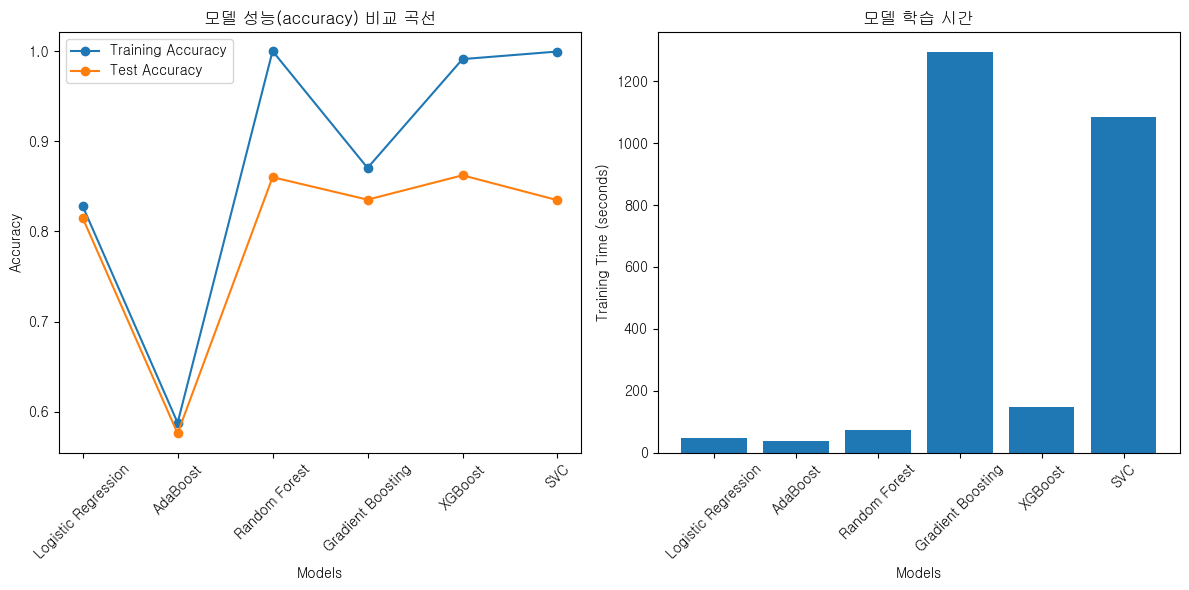

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

# 모델 학습 후, 예측을 통해 성능 측정
models = [logistic, ada, random_forest, Gradient, xgb, svc]
model_names = ['Logistic Regression', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVC']
times = [lr_time, ada_time, forest_time, gradient_time, xgb_time, svc_time]

train_scores, test_scores = [], []

for model in models:
    # 훈련 데이터에서의 성능
    train_pred = model.predict(train_images_pca)
    train_scores.append(accuracy_score(train_labels, train_pred))

    # 검증 데이터에서의 성능
    test_pred = model.predict(test_images_pca)
    test_scores.append(accuracy_score(test_labels, test_pred))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 곡선
plt.subplot(1, 2, 1)
plt.plot(model_names, train_scores, marker='o', label='Training Accuracy')
plt.plot(model_names, test_scores, marker='o', label='Test Accuracy')
plt.title('모델 성능(accuracy) 비교 곡선')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()

# 학습 시간
plt.subplot(1, 2, 2)
plt.bar(model_names, times)
plt.title('모델 학습 시간')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [ ]:
# logistic
y_train_lr = logistic.predict(df_train_x)
y_pred_lr = logistic.predict(df_test_x)
logistic_train_performance = metrics.accuracy_score(train_labels,y_train_lr )
logistic_accuracy = metrics.accuracy_score(test_labels, y_pred_lr)

# 정확도 계산
print(f" Train Accuracy: {logistic_train_performance * 100:.2f}%")
print(f" Test Accuracy: {logistic_accuracy * 100:.2f}%")
# ======================================================================================================#
# 보고서
print(metrics.classification_report(test_labels, y_pred_lr))

# 정밀도, 재현율, F1 점수 추출
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_lr, average=None)

# Macro 평균 계산
macro_avg = precision.mean(), recall.mean(), f1_score.mean()

# Micro 평균 계산
micro_avg = precision_recall_fscore_support(test_labels, y_pred_lr, average='micro')[:3]

# Weighted 평균 계산
weighted_avg = precision_recall_fscore_support(test_labels, y_pred_lr, average='weighted')[:3]

# 결과 출력
print("Macro 평균:", macro_avg)
print(f'macro precision:{macro_avg[0] * 100:.2f}%, macro recall:{macro_avg[1] * 100:.2f}%, macro f1-score:{macro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Micro 평균:", micro_avg)
print(f'micro precision:{micro_avg[0] * 100:.2f}%, micro recall:{micro_avg[1] * 100:.2f}%, micro f1-score:{micro_avg[2] * 100:.2f}%')
print('==================================='*3)
print("Weighted 평균:", weighted_avg)
print(f'weighted precision:{weighted_avg[0] * 100:.2f}%, weighted recall:{weighted_avg[1] * 100:.2f}%, weighted f1-score:{weighted_avg[2] * 100:.2f}%')

In [81]:
y_pred_lr_prob = logistic.predict_proba(df_test_x)
y_pred_lr_prob

array([[3.87787703e-04, 4.54786995e-05, 1.06680918e-03, ...,
        1.82660320e-01, 1.79297572e-02, 5.68879250e-01],
       [2.99990080e-04, 2.66130870e-07, 8.95621245e-01, ...,
        1.58941833e-10, 3.74776836e-05, 2.94727862e-07],
       [6.06984021e-03, 9.79476232e-01, 3.31144588e-03, ...,
        2.43232261e-05, 6.42916716e-03, 4.46990142e-06],
       ...,
       [1.21082102e-01, 1.42847098e-05, 3.12372367e-03, ...,
        9.56161371e-07, 6.00948645e-01, 3.72954609e-05],
       [2.06234602e-03, 9.37318222e-01, 6.45705950e-04, ...,
        6.82357558e-05, 2.92107287e-04, 2.23371743e-03],
       [1.88524233e-03, 2.77274361e-04, 8.55214734e-03, ...,
        4.74514564e-02, 1.48781582e-02, 1.35651068e-03]])

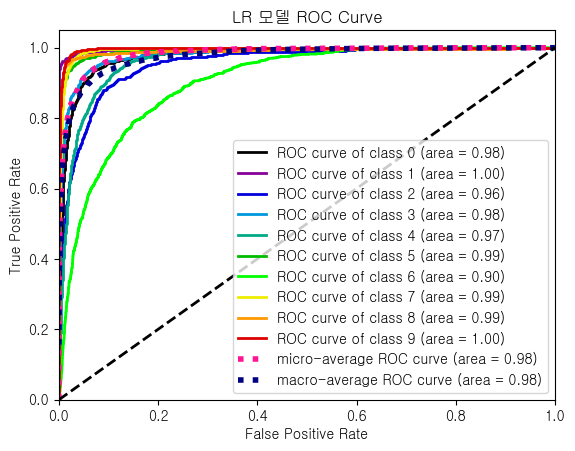

In [83]:
skplt.metrics.plot_roc(test_labels, y_pred_lr_prob)

plt.title('LR 모델 ROC Curve')
plt.show()